In [1]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import re
import string  
import spacy
import gensim
from gensim import corpora
import scipy
from wordcloud import WordCloud

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.stem import WordNetLemmatizer 
    

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns 
 
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv('scraped_review.csv')

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
dataset.head()

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Stars
0,I would like to say Kotak 811 is one of the app where you can make you accout with mini kyc.\r\n\r\nHere yo get features like virtual 811 card and ths visa enebled.\r\n\r\nI takes half an hour to ...,1
1,I have been experienced that now a days Kotak is not giving proper service I'm trying customer care no from last one month but it is not connecting only. And now update in update why need access f...,1
2,I got worst messages to open account.\r\n\r\nThe short link goes to kotak bank account page\r\n\r\nBulk of messages fake\r\n\r\n...Read More,1
3,"Kotak 811 is one of the best banking application I have ever seen.I am a student and I was in need of an bank account from where I can do my transaction without paying any deductions.So, one of my...",3
4,"Kotak 811 comes with many features & made mobile banking easier than earlier. Full command on bank account with mobile application, instant money transfer, zero savings account & much more feature...",3


In [4]:
dataset.Stars[dataset.Stars == 1 ] = 0


print(dataset)

                                                                                                                                                                                                      Review  \
0    I would like to say Kotak 811 is one of the app where you can make you accout with mini kyc.\r\n\r\nHere yo get features like virtual 811 card and ths visa enebled.\r\n\r\nI takes half an hour to ...   
1    I have been experienced that now a days Kotak is not giving proper service I'm trying customer care no from last one month but it is not connecting only. And now update in update why need access f...   
2                                                               I got worst messages to open account.\r\n\r\nThe short link goes to kotak bank account page\r\n\r\nBulk of messages fake\r\n\r\n...Read More   
3    Kotak 811 is one of the best banking application I have ever seen.I am a student and I was in need of an bank account from where I can do my transaction without pa

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-4-251fda16e759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Stars[dataset.Stars == 1 ] = 0


In [5]:

dataset.Stars[dataset.Stars == 2 ] = 0


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-10c614a751e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Stars[dataset.Stars == 2 ] = 0


In [6]:
dataset.Stars[dataset.Stars == 5 ] = 1
dataset.Stars[dataset.Stars == 4 ] = 1
dataset.Stars[dataset.Stars == 3 ] = 1
print(dataset)

                                                                                                                                                                                                      Review  \
0    I would like to say Kotak 811 is one of the app where you can make you accout with mini kyc.\r\n\r\nHere yo get features like virtual 811 card and ths visa enebled.\r\n\r\nI takes half an hour to ...   
1    I have been experienced that now a days Kotak is not giving proper service I'm trying customer care no from last one month but it is not connecting only. And now update in update why need access f...   
2                                                               I got worst messages to open account.\r\n\r\nThe short link goes to kotak bank account page\r\n\r\nBulk of messages fake\r\n\r\n...Read More   
3    Kotak 811 is one of the best banking application I have ever seen.I am a student and I was in need of an bank account from where I can do my transaction without pa

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-acd1486030c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Stars[dataset.Stars == 5 ] = 1
<ipython-input-6-acd1486030c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Stars[dataset.Stars == 4 ] = 1
<ipython-input-6-acd1486030c8>

In [7]:

print("The number of Positive reviews=", (dataset["Stars"]==1).sum())
print("The number of Negative reviews=", (dataset["Stars"]==0).sum())

The number of Positive reviews= 103
The number of Negative reviews= 72


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:

pos_rev=" "
neg_rev=" "

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:

for i in range(0,175):
    if dataset["Stars"][i]==1:
        pos_rev=pos_rev+" "+dataset["Review"][i]
    if dataset["Stars"][i]==0:
        neg_rev=neg_rev+" "+dataset["Review"][i]

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
print("Length of positive reviews-",len(pos_rev))
print("")
print("Part of positive reviews-")
print(pos_rev[175:350])

Length of positive reviews- 31351

Part of positive reviews-
eductions.So, one of my friend suggests me kotak 811 digital banking and I thought this would be a best option for me. so I...Read More Kotak 811 comes with many features & ma


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print("Length of negative reviews-",len(neg_rev))
print("")
print("Part of negative reviews-")
print(neg_rev[175:350])

Length of negative reviews- 21430

Part of negative reviews-
alf an hour to complete the process to register your mobile number on the app.

You need to perform mini kyc to access so...Read More I have been experienced that now a days


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import string
string.punctuation

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:

#removing the punctuations

text_nopunct_pos=''

text_nopunct_pos= "".join([char for char in pos_rev if char not in string.punctuation])

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-16-87811a538dd7>:2: DeprecationWarning: invalid escape sequence \w
  tokenizer = nltk.tokenize.RegexpTokenizer('\w+')


In [17]:

#Tokenizing the text
pos_tokens = tokenizer.tokenize(text_nopunct_pos)
len(pos_tokens)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5632

In [18]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words_pos = []

# Looping through the tokens and make them lower case
for word in pos_tokens:
    words_pos.append(word.lower())

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.

stopwords = nltk.corpus.stopwords.words('english')

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
final_words_pos=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words_pos:
    if word not in stopwords:
        final_words_pos.append(word)


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
wn = WordNetLemmatizer()

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
lem_words_pos=[]

for word in final_words_pos:
    word=wn.lemmatize(word)
    lem_words_pos.append(word)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#The frequency distribution of the words
freq_dist_pos = nltk.FreqDist(lem_words_pos)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


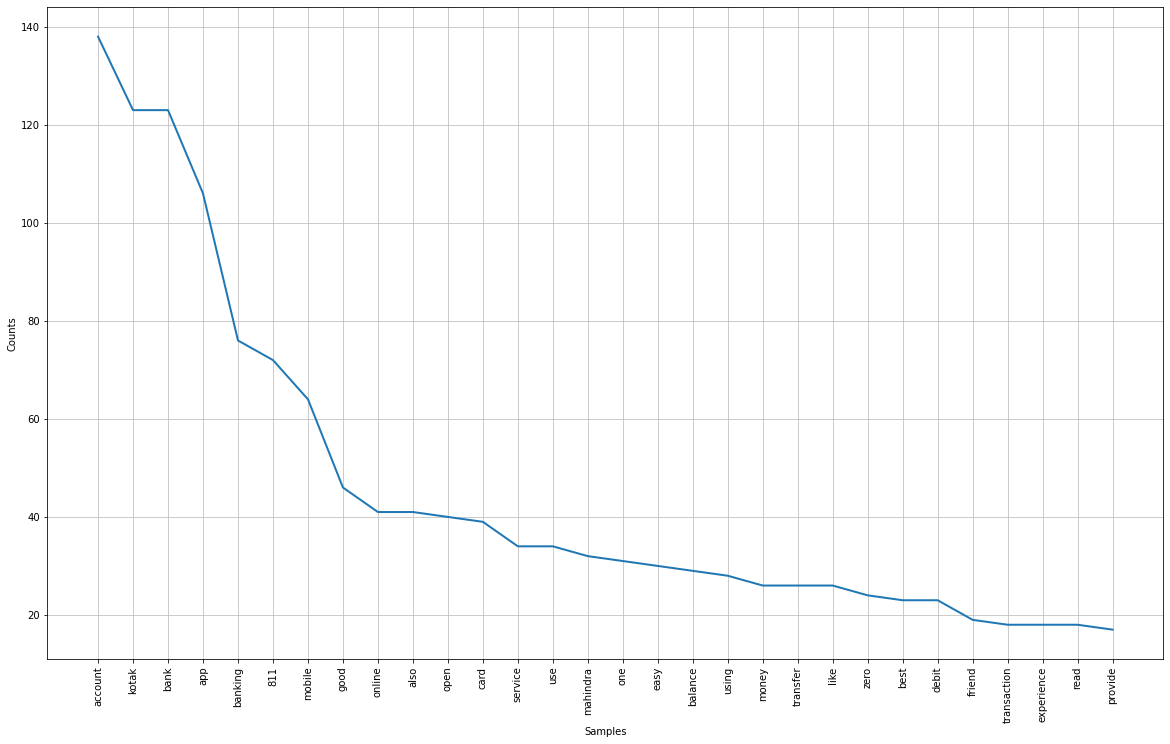

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:

#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist_pos.plot(30)

In [28]:
#converting into string

res_pos=' '.join([i for i in lem_words_pos if not i.isdigit()])


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


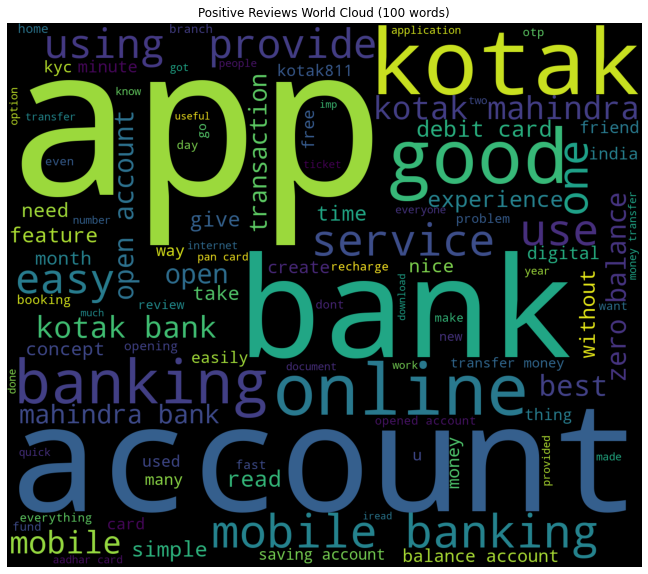

In [30]:
from wordcloud import WordCloud
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res_pos)


plt.imshow(wordcloud)
plt.title('Positive Reviews World Cloud (100 words)')
plt.axis('off')
plt.show()

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


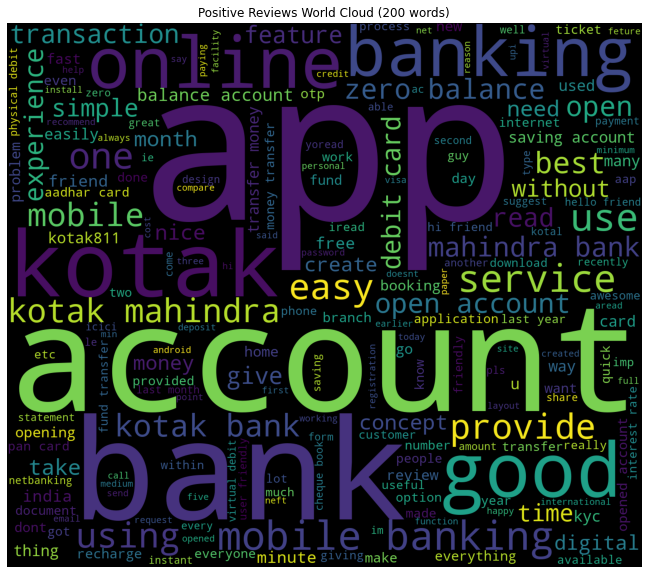

In [31]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res_pos)


plt.imshow(wordcloud)
plt.title('Positive Reviews World Cloud (200 words)')
plt.axis('off')
plt.show()

In [32]:
text_nopunct_neg=''

text_nopunct_neg= "".join([char for char in neg_rev if char not in string.punctuation])

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:

#Tokenizing the text
neg_tokens = tokenizer.tokenize(text_nopunct_neg)
len(neg_tokens)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3891

In [34]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words_neg = []

# Looping through the tokens and make them lower case
for word in neg_tokens:
    words_neg.append(word.lower())

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
final_words_neg=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words_neg:
    if word not in stopwords:
        final_words_neg.append(word)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
lem_words_neg=[]

for word in final_words_neg:
    word=wn.lemmatize(word)
    lem_words_neg.append(word)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
#The frequency distribution of the words
freq_dist_neg = nltk.FreqDist(lem_words_neg)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


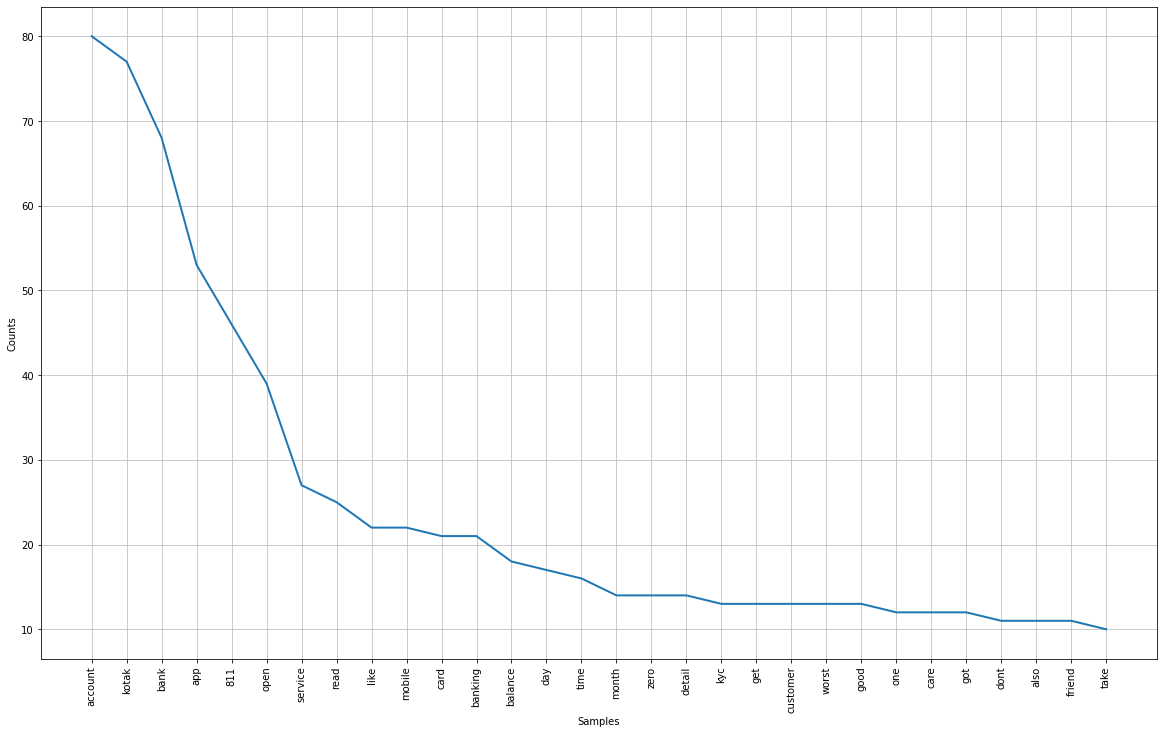

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [38]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist_neg.plot(30)

In [39]:
#converting into string

res_neg=' '.join([i for i in lem_words_neg if not i.isdigit()])


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


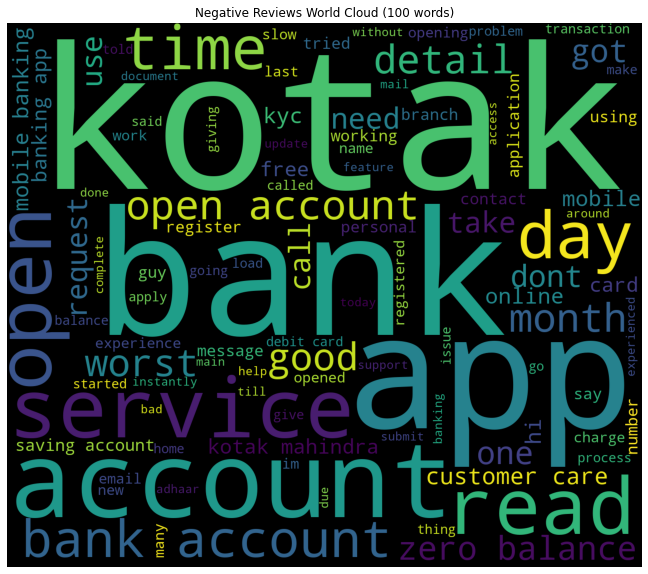

In [40]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res_neg)


plt.imshow(wordcloud)
plt.title('Negative Reviews World Cloud (100 words)')
plt.axis('off')
plt.show()

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


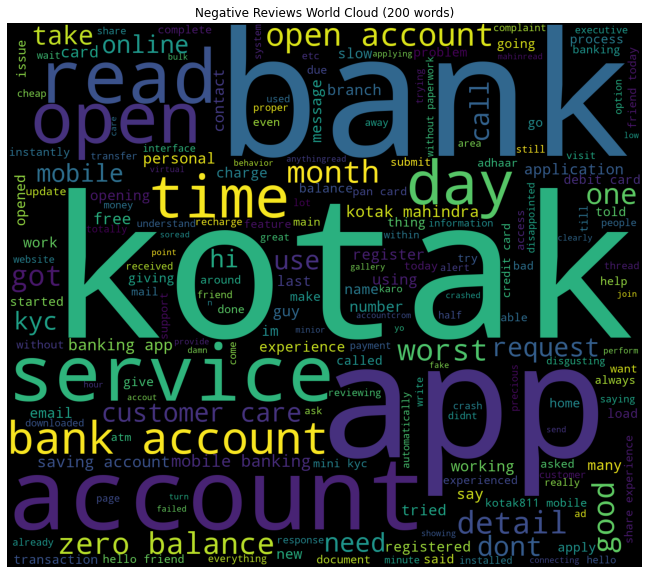

In [42]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res_neg)


plt.imshow(wordcloud)
plt.title('Negative Reviews World Cloud (200 words)')
plt.axis('off')
plt.show()

In [43]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


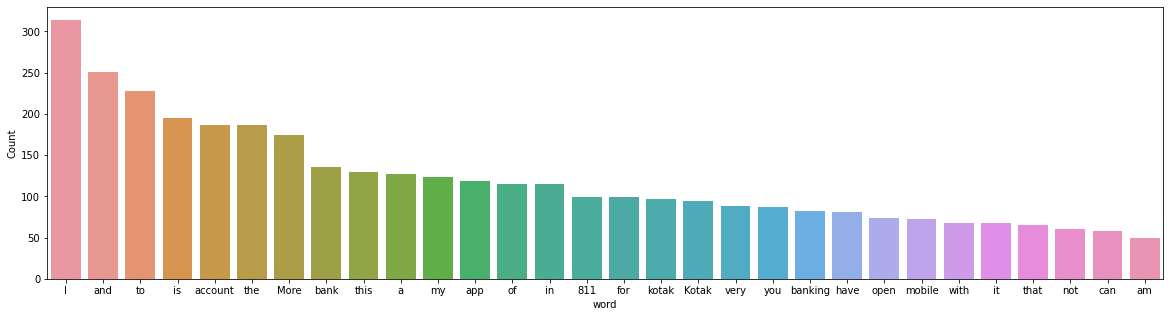

In [46]:
freq_words(dataset['Review'])

In [47]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Preprocessing
nltk.download('stopwords')
corpus = []
for i in range(0, 175):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    corpus.append(review)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features = 350)

#the X and y
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(131, 350)
(131,)
(44, 350)
(44,)


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:

#using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
# Random Forest
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:

#accuracy score and classification report

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
accuracy_score(y_test, y_pred)

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6818181818181818

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, dataset.Stars, train_size=0.75
                                                )
for c in [0.01,0.05,0.25,0.5,1]:

    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print("Accuracy for C =%s: %s"
         %(c, accuracy_score(y_val, lr.predict(X_val))))
    

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobyte

Accuracy for C =0.01: 0.7727272727272727
Accuracy for C =0.05: 0.7272727272727273


C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  t

Accuracy for C =0.25: 0.7727272727272727
Accuracy for C =0.5: 0.7727272727272727


C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  t

Accuracy for C =1: 0.7727272727272727


C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\Users\ksmad\anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  t

In [83]:
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
clf=naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)


C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MultinomialNB()

In [85]:
roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

C:\Users\ksmad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9441964285714286